### EDA

In [1]:
# import and load dataset

In [3]:
import pandas as pd
df = pd.read_csv('data/dataset_complaints.csv')
df

<ipython-input-3-2b01a2f67e0f>:2: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data/dataset_complaints.csv')


,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2019-05-03,Student loan,Private student loan,Struggling to repay your loan,Can't get other flexible options for repaying ...,NaN,NaN,Ameritech Financial,FL,33023.0,NaN,Consent not provided,Web,2019-05-15,Untimely response,No,NaN,3231257
1,2022-01-15,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Account information incorrect,NaN,NaN,Experian Information Solutions Inc.,NV,89146.0,NaN,NaN,Web,2022-01-15,In progress,Yes,NaN,5111916
2,2017-04-29,Debt collection,Credit card debt,Threatened to contact someone or share informa...,Contacted you after you asked them to stop,I have judgment hurting my ability to get a jo...,NaN,Hunt & Henriques,CA,91711.0,NaN,Consent provided,Web,2017-05-30,Closed with explanation,Yes,NaN,2470819
3,2022-01-14,Debt collection,Medical debt,Written notification about debt,Didn't receive enough information to verify debt,NaN,NaN,"FIDELITY CAPITAL HOLDINGS, INC",CA,93535.0,NaN,NaN,Web,2022-01-14,Untimely response,No,NaN,5108201
4,2019-10-05,"Credit reporting, credit repair services, or o...",Other personal consumer report,Incorrect information on your report,Public record information inaccurate,NaN,NaN,"EQUIFAX, INC.",CA,91401.0,NaN,Consent not provided,Web,2019-10-05,Closed with explanation,Yes,NaN,3396987
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2458307,2017-02-09,Debt collection,I do not know,Cont'd attempts collect debt not owed,Debt resulted from identity theft,I have disputed my debts several times with no...,NaN,Bonneville Billing and Collections,UT,84054.0,Servicemember,Consent provided,Web,2017-02-09,Closed with explanation,Yes,No,2334969
2458308,2015-04-29,Mortgage,Conventional fixed mortgage,"Loan modification,collection,foreclosure",NaN,My father died in XX/XX/XXXX. Left me his only...,NaN,"CITIBANK, N.A.",OK,74066.0,NaN,Consent provided,Web,2015-04-29,Closed with explanation,Yes,No,1352738
2458309,2017-03-31,Credit reporting,NaN,Credit reporting company's investigation,No notice of investigation status/result,cfbp i would Like to file a complaint on Exper...,Company has responded to the consumer and the ...,Experian Information Solutions Inc.,MN,55379.0,NaN,Consent provided,Web,2017-03-31,Closed with non-monetary relief,Yes,Yes,2412926
2458310,2017-01-16,Credit reporting,NaN,Incorrect information on credit report,Account status,My husband and I are in the middle of an FHA S...,Company has responded to the consumer and the ...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",GA,30215.0,NaN,Consent provided,Web,2017-01-16,Closed with explanation,Yes,No,2292586


In [5]:
df.size

44249616

In [6]:
df.shape

(2458312, 18)

### We need Product and consumer complaint narrative 

input = Consumer complaint narrative
target/output = Product

In [1]:
# reomove missing values in input and add column encoding(categorical encoding)

In [4]:
from io import StringIO
col = ['Product', 'Consumer complaint narrative']
df = df[col]
df = df[pd.notnull(df['Consumer complaint narrative'])]
df.columns = ['Product', 'Consumer_complaint_narrative']
df['category_id'] = df['Product'].factorize()[0]
category_id_df = df[['Product', 'category_id']].drop_duplicates().sort_values('category_id')
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'Product']].values)
df.head()

,Product,Consumer_complaint_narrative,category_id
2,Debt collection,I have judgment hurting my ability to get a jo...,0
13,Debt collection,This complaint is directed at the actions of M...,0
17,Credit card or prepaid card,I opened a PayPal account so that my unemploym...,1
28,"Credit reporting, credit repair services, or o...",I received a call from a student loan company ...,2
34,"Credit reporting, credit repair services, or o...",This serves to notify you on the inaccurate in...,2


### check if dataset is balanced or not ?

In [5]:
%config Completer.use_jedi = False

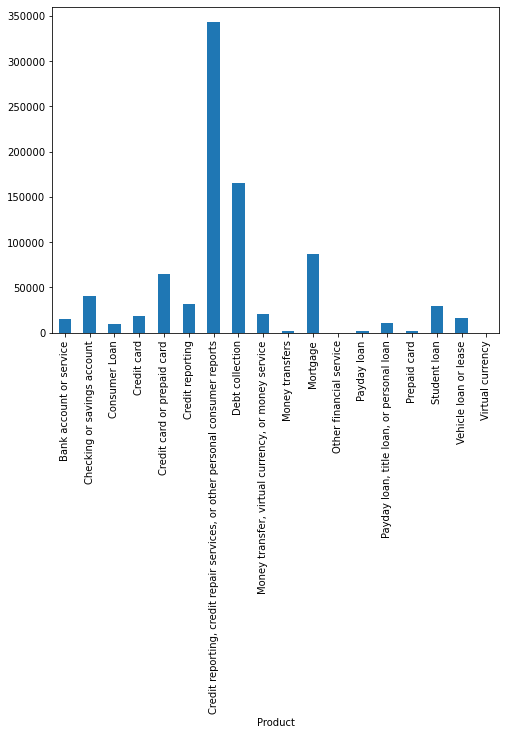

In [6]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
df.groupby('Product').Consumer_complaint_narrative.count().plot.bar(ylim=0)
plt.show()

so Credit reporting* , Debt collection , Mortgage has high values and rest are having less values
so this is imbalanced dataset!

Conventional algorithms are often biased towards the majority class, not taking the data distribution into consideration. In the worst case, minority classes are treated as outliers and ignored. For some cases, such as fraud detection or cancer prediction, we would need to carefully configure our model or artificially balance the dataset, for example by undersampling or oversampling each class.

### Text conversion using Tf-IDF vectorizer

will use sklearn.feature_extraction.text.TfidfVectorizer to calculate a tf-idf vector for each of consumer complaint narratives:
* sublinear_df is set to True to use a logarithmic form for frequency.
* min_df is the minimum numbers of documents a word must be present in to be kept.
* norm is set to l2, to ensure all our feature vectors have a euclidian norm of 1.
* ngram_range is set to (1, 2) to indicate that we want to consider both unigrams and bigrams.
* stop_words is set to "english" to remove all common pronouns ("a", "the", ...) to reduce the number of noisy features.

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer

# instantiate the tfidf

tfidf = TfidfVectorizer(sublinear_tf=True,min_df=10,norm='l2',encoding='latin-1',ngram_range=(1,2),
                       stop_words='english')
features = tfidf.fit_transform(df.Consumer_complaint_narrative).toarray()
labels = df.category_id


MemoryError: Unable to allocate 4.15 TiB for an array with shape (857860, 665372) and data type float64

In [9]:
# super I got an error 

from sklearn.feature_extraction.text import TfidfVectorizer

# instantiate the tfidf

tfidf = TfidfVectorizer(sublinear_tf=True,min_df=10,norm='l2',encoding='latin-1',ngram_range=(1,2),
                       stop_words='english')
features = tfidf.fit_transform(df.Consumer_complaint_narrative)
labels = df.category_id

In [ ]:
# toarray() converts sparse matrix into dense matrix but it takes lot of RAM as can be seen now
# https://stackoverflow.com/questions/35109424/how-to-make-tf-idf-matrix-dense
# so next time Im going to leave sparse as is (for such large dataset!)

# is it because I used min_df = 10 ?
# better to keep 5 (https://www.reddit.com/r/learnmachinelearning/comments/6evguc/while_building_a_tfidf_determining_a_good_balance/)

A great article on lessons learnt : https://ai.plainenglish.io/whats-wrong-with-this-graph-a-closer-look-at-troubleshooting-tf-idf-4217cf38c5e7

In [10]:
features.shape

(857860, 665372)

### Feature Selection

In [11]:
from sklearn.feature_selection import chi2
# can I use SelectKBest instead of chi2 -- ?
import numpy as np

N = 2

for Product, category_id in sorted(category_to_id.items()):
      features_chi2 = chi2(features, labels == category_id)
      indices = np.argsort(features_chi2[0])
      feature_names = np.array(tfidf.get_feature_names())[indices]
      unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
      bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
      print("# '{}':".format(Product))
      print("  . Most correlated unigrams:\n       . {}".format('\n       . '.join(unigrams[-N:])))
      print("  . Most correlated bigrams:\n       . {}".format('\n       . '.join(bigrams[-N:])))

# 'Bank account or service':
  . Most correlated unigrams:
       . citigold
       . overdraft
  . Most correlated bigrams:
       . citigold checking
       . overdraft fees
# 'Checking or savings account':
  . Most correlated unigrams:
       . checking
       . deposit
  . Most correlated bigrams:
       . savings account
       . checking account
# 'Consumer Loan':
  . Most correlated unigrams:
       . vehicle
       . car
  . Most correlated bigrams:
       . dealer services
       . drive time
# 'Credit card':
  . Most correlated unigrams:
       . macy
       . card
  . Most correlated bigrams:
       . american express
       . credit card
# 'Credit card or prepaid card':
  . Most correlated unigrams:
       . citi
       . card
  . Most correlated bigrams:
       . american express
       . credit card
# 'Credit reporting':
  . Most correlated unigrams:
       . experian
       . equifax
  . Most correlated bigrams:
       . tax lien
       . disputed resolve
# 'Credit repor

## Training!

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
X_train, X_test, y_train, y_test = train_test_split(df['Consumer_complaint_narrative'], df['Product'], random_state = 0)
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
nb = MultinomialNB().fit(X_train_tfidf, y_train)

### Prediction time

In [15]:
nb.predict(count_vect.transform(["I have judgment hurting my ability to get a job. I am in a debtor prison, I am not gainfully employed.  Pyod and Hunt and Henriques are unfai r as you can the summons was not even stamped by clerk.They refused to attend hearing to work out issues in court"]))

array(['Debt collection'], dtype='<U76')

It worked !!

### Many Models theory

* Logistic Regression
* (Multinomial) Naive Bayes
* Linear Support Vector Machine
* Random Forest

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
models = [
    RandomForestClassifier(n_estimators=100, max_depth=3, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]
CV = 6
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
    model_name = model.__class__.__name__
    accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
    for fold_idx, accuracy in enumerate(accuracies):
        entries.append((model_name, fold_idx, accuracy))
        cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])
import seaborn as sns
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

KeyboardInterrupt: 

In [ ]:
cv_df.groupby('model_name').accuracy.mean()

### Model Evaluation

In [ ]:
model = LinearSVC()
X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, df.index, test_size=0.33, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=category_id_df.Product.values, yticklabels=category_id_df.Product.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [ ]:
# classification report for each class:

In [ ]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred, target_names=df['Product'].unique()))